In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# Loading the amazon dataset
df = pd.read_csv("C:/Users/rath_/Documents/GitHub/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

In [3]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
# Part 1: Analyzing Best-Seller Trends Across Product Categories
# Objective: Understand the relationship between product categories and their best-seller status.
# Crosstab Analysis: Create a crosstab between the product category and the isBestSeller status.
# Are there categories where being a best-seller is more prevalent?
# Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [5]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

In [6]:
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [7]:
crosstab_result['proportion_of_best_sellers'] = crosstab_result[True] / (crosstab_result[True] + crosstab_result[False])
crosstab_result_sorted = crosstab_result.sort_values(by='proportion_of_best_sellers', ascending=False)

# Display the sorted crosstab result
print("Crosstab Analysis - Proportion of Best-Sellers by Product Category:")
print(crosstab_result_sorted)

Crosstab Analysis - Proportion of Best-Sellers by Product Category:
isBestSeller                      False  True  proportion_of_best_sellers
category                                                                 
Grocery                            9008   556                    0.058135
Smart Home Security & Lighting       98     6                    0.057692
Health & Personal Care             9017   552                    0.057686
Mobile Phone Accessories            248    11                    0.042471
Power & Hand Tools                 8353   306                    0.035339
...                                 ...   ...                         ...
CD, Disc & Tape Players            8798     0                    0.000000
General Music-Making Accessories    259     0                    0.000000
Snowboard Boots                    1449     0                    0.000000
Boxes & Organisers                  911     0                    0.000000
eBook Readers & Accessories         246     

In [8]:
# Statistical Tests:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Compute Cramér's V to understand the strength of association between best-seller status and category.

In [9]:
from scipy.stats import chi2_contingency

In [10]:
contingency_table = pd.crosstab(df['category'], df['isBestSeller'])

In [11]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [12]:
n = contingency_table.sum().sum()
v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

In [13]:
print("Chi-square test:")
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)
print("\nCramér's V:", v)

Chi-square test:
Chi-square statistic: 36540.20270061387
p-value: 0.0
Degrees of freedom: 295
Expected frequencies:
 [[2.47190130e+02 8.09870149e-01]
 [4.05371878e+03 1.32812173e+01]
 [2.49183599e+02 8.16401360e-01]
 [1.69145827e+03 5.54173243e+00]
 [2.53170536e+02 8.29463782e-01]
 [8.50214439e+03 2.78556144e+01]
 [1.06650580e+02 3.49419782e-01]
 [2.57157474e+02 8.42526204e-01]
 [9.51781673e+03 3.11832664e+01]
 [1.50008526e+04 4.91473619e+01]
 [9.32544700e+03 3.05530045e+01]
 [2.38219520e+02 7.80479700e-01]
 [3.22941944e+03 1.05805616e+01]
 [9.44704859e+03 3.09514084e+01]
 [6.68808779e+03 2.19122125e+01]
 [5.26275760e+02 1.72423967e+00]
 [1.90296531e+04 6.23469391e+01]
 [2.77191835e+03 9.08164873e+00]
 [2.53170536e+02 8.29463782e-01]
 [4.04674164e+02 1.32583581e+00]
 [1.92489346e+04 6.30653723e+01]
 [3.10482764e+03 1.01723609e+01]
 [2.04330551e+02 6.69449115e-01]
 [6.28839730e+03 2.06027047e+01]
 [5.23385231e+03 1.71476942e+01]
 [9.52180367e+03 3.11963288e+01]
 [2.48186864e+02 8.131357

In [14]:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

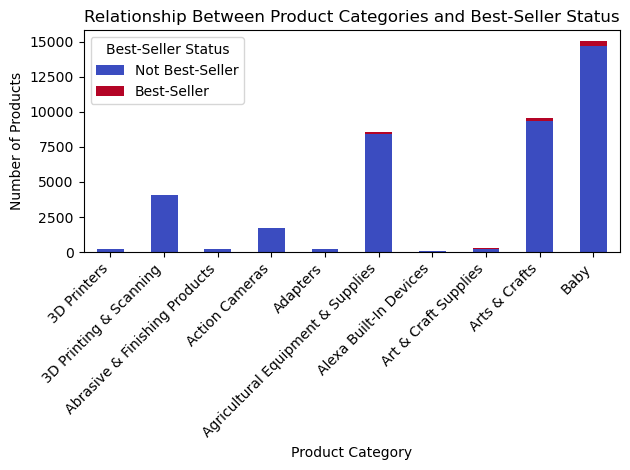

In [15]:
contingency_table.head(10).plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Relationship Between Product Categories and Best-Seller Status')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.legend(title='Best-Seller Status', labels=['Not Best-Seller', 'Best-Seller'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands
#Objective: Investigate how different product categories influence product prices.
#Preliminary Step: Remove outliers in product prices.
#For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third
#quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

In [17]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

In [18]:
IQR = Q3 - Q1

In [19]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [20]:
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [21]:
print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", df_no_outliers.shape)

Original dataset shape: (2443651, 9)
Dataset shape after removing outliers: (2115963, 9)


In [22]:
# Violin Plots:
# Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
# Which product category tends to have the highest median price? Don't filter here by top categories.

In [23]:
top_categories = df_no_outliers['category'].value_counts().nlargest(20).index
data_filtered = df_no_outliers[df_no_outliers['category'].isin(top_categories)]

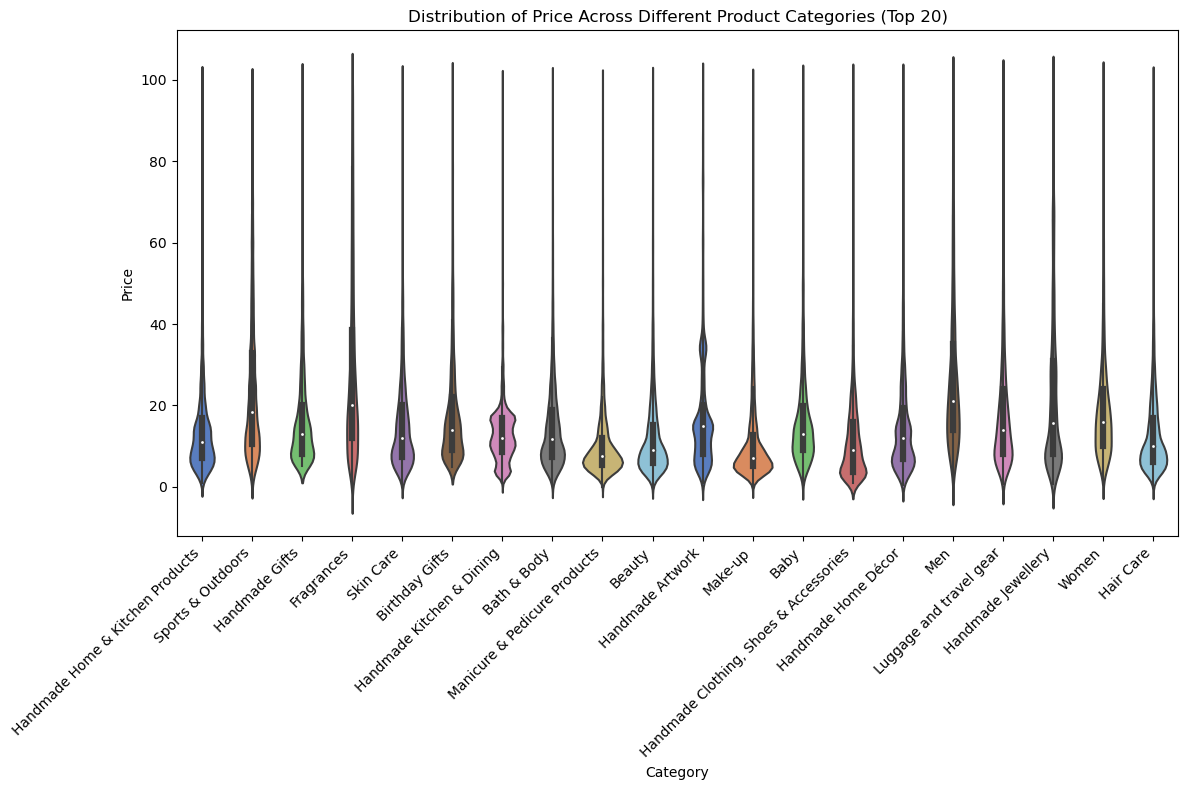

In [24]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=data_filtered, palette='muted')
plt.title('Distribution of Price Across Different Product Categories (Top 20)')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
# Bar Charts: Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Which product category commands the highest average price? Don't filter here by top categories.

In [26]:
average_price_by_category = df.groupby('category')['price'].mean().nlargest(10)
top_categories = df_no_outliers['category'].value_counts().nlargest(10).index
data_filtered = df_no_outliers[df_no_outliers['category'].isin(top_categories)]

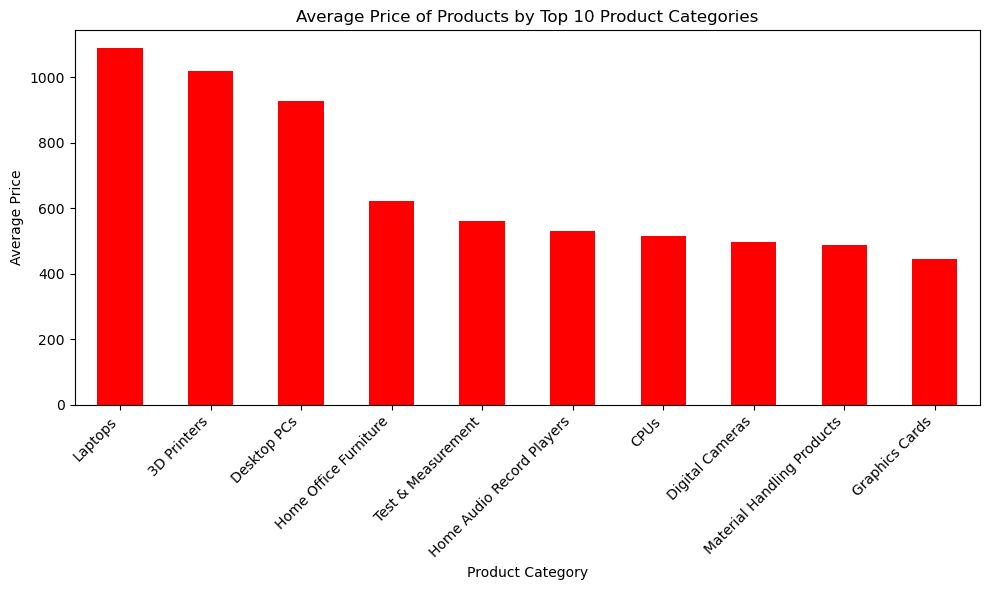

In [27]:
plt.figure(figsize=(10, 6))
average_price_by_category.plot(kind='bar', color='red')
plt.title('Average Price of Products by Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
highest_avg_price_category = average_price_by_category.idxmax()
print("Product category with the highest average price:", highest_avg_price_category)

Product category with the highest average price: Laptops


In [29]:
# Box Plots:Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [30]:
# Filter out the top 10 categories based on count
top_categories = df['category'].value_counts().nlargest(10).index
data_filtered = df[df['category'].isin(top_categories)]

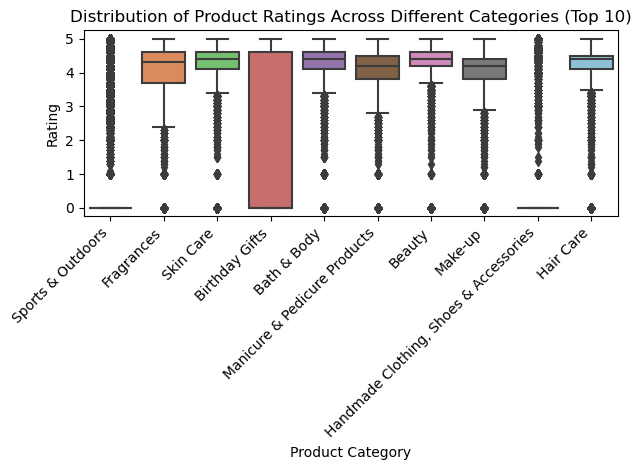

In [31]:
sns.boxplot(x='category', y='stars', data=data_filtered, palette='muted')
plt.title('Distribution of Product Ratings Across Different Categories (Top 10)')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
highest_median_rating_category = df.groupby('category')['stars'].median().idxmax()
print("Category with the highest median rating:", highest_median_rating_category)

Category with the highest median rating: Computer Memory


In [33]:
#Part 3: Investigating the Interplay Between Product Prices and Ratings
#Objective: Analyze how product ratings (stars) correlate with product prices.
#Correlation Coefficients:Calculate the correlation coefficient between price and stars.
#Is there a significant correlation between product price and its rating?

In [34]:
# Calculate the correlation coefficient
correlation_coefficient = df['price'].corr(df['stars'])

In [35]:
# Print the correlation coefficient
print("Correlation Coefficient between Price and Stars:", correlation_coefficient)

Correlation Coefficient between Price and Stars: -0.12490673262159059


In [36]:
# Determine if there is a significant correlation
if correlation_coefficient >= 0.5:
    print("There is a strong positive correlation between product price and its rating.")
elif correlation_coefficient <= -0.5:
    print("There is a strong negative correlation between product price and its rating.")
else:
    print("There is no significant correlation between product price and its rating.")

There is no significant correlation between product price and its rating.


In [37]:
#Visualizations:Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
#Use a correlation heatmap to visualize correlations between all numerical variables.
#Examine if product prices typically follow a normal distribution using a QQ plot.

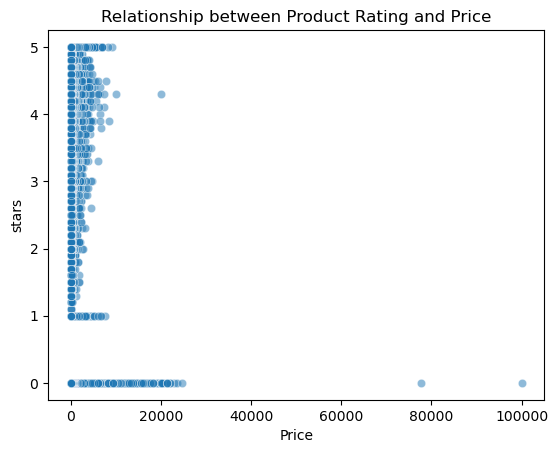

In [38]:
# Scatter plot for relationship between product rating and price
sns.scatterplot(x='price', y='stars', data=df, alpha=0.5)
plt.title('Relationship between Product Rating and Price')
plt.xlabel('Price')
plt.ylabel('stars')
plt.show()

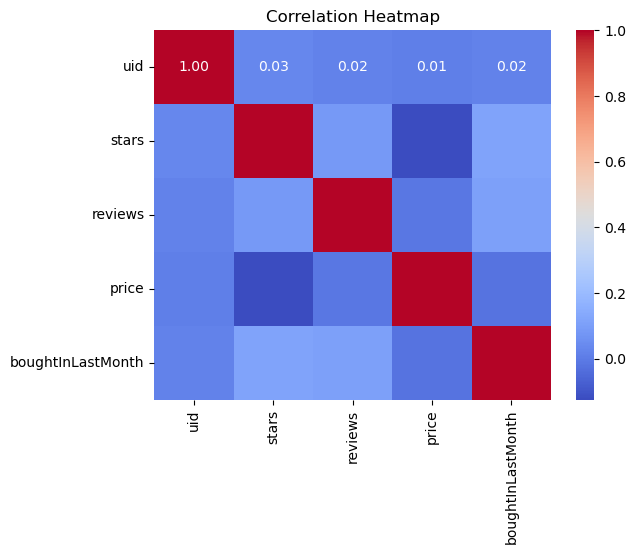

In [39]:
# Drop non-numeric columns if any
data_numeric = df.select_dtypes(include='number')

# Correlation heatmap

sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

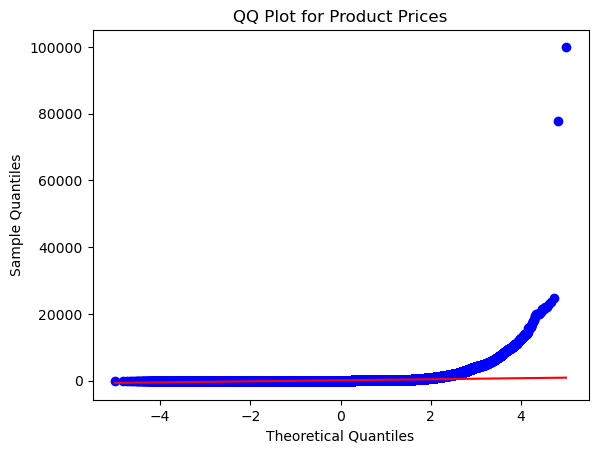

In [40]:
# QQ plot for product prices to check for normal distribution
from scipy import stats
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()